 Prepare the general libraries.

In [1]:
# libraries
library(community)
library(ggplot2)

 Prepare the path.

In [2]:
# the path to the counts, cell annotation and sample annation file. In this case its our working dir same as
# the notebook
path_in <- 'computed_results/'

print("path_in")
print(path_in)

[1] "path_in"
[1] "computed_results/"


Load data.

In [3]:
suppressWarnings(load(paste0(path_in,"interactions.RData")))

Load functions for visualization.

In [4]:
data("visualization_functions")

## Parameters

In [5]:
# threshold for log2FC of the weights
threshold_log2FC <- interactions$thresholds$threshold_log2FC

idx_up <- interactions$anno_interactions$log2FC_weights > threshold_log2FC
idx_unchanged <- abs(interactions$anno_interactions$log2FC_weights)<= threshold_log2FC
idx_down <- interactions$anno_interactions$log2FC_weights < -threshold_log2FC
idx_sign <- !is.na(interactions$anno_interactions$sign) & interactions$anno_interactions$sign
idx_good <- interactions$anno_interactions$passed_QC_filter

In [6]:
# extract cell types
cell_types <- unique(interactions$anno_cells$cell_type)
print(cell_types)

[1] "HSPC" "Mono" "DC"   "Ery"  "T"    "B"   


In [7]:
# define broad type of interactions by cell types
immune_cell_types <- cell_types[!(cell_types %in% c("Ery","HSPC"))]

interaction_cell_types <- unique(paste(interactions$anno_interactions$sending_cell_type
                                ,interactions$anno_interactions$receiving_cell_type
                                ,sep = " to "))

interaction_type <- sapply(interaction_cell_types
                           ,function(i){
                               ifelse(grepl("Ery",i)
                                      ,"engages Ery"
                                      ,ifelse(grepl("HSPC",i)
                                              ,"engages HSPC"
                                              ,"among immune cells"))
                           })
print(str(interaction_type))

interaction_type_by_ID <- sapply(interactions$anno_interactions$interaction_ID
                           ,function(i){
                               ifelse(grepl("Ery",i)
                                      ,"engages Ery"
                                      ,ifelse(grepl("HSPC",i)
                                              ,"engages HSPC"
                                              ,"among immune cells"))
                           })
print(str(interaction_type_by_ID))

colors_interaction_type <- c("engages HSPC" = "magenta"
                             ,"among immune cells" = "deepskyblue"
                             ,"engages Ery" = "darkgoldenrod3"#"lightgoldenrod"
                            )
print(colors_interaction_type)

 Named chr [1:36] "engages HSPC" "engages HSPC" "engages HSPC" ...
 - attr(*, "names")= chr [1:36] "HSPC to HSPC" "HSPC to Mono" "HSPC to DC" "HSPC to Ery" ...
NULL
 Named chr [1:62064] "engages HSPC" "engages HSPC" "engages HSPC" ...
 - attr(*, "names")= chr [1:62064] "HSPC:IGF1_HSPC:IGF1R" "HSPC:JAG1_HSPC:NOTCH1" "HSPC:IGF2_HSPC:IGF2R" "HSPC:FLT3LG_HSPC:FLT3" ...
NULL
      engages HSPC among immune cells        engages Ery 
         "magenta"      "deepskyblue"   "darkgoldenrod3" 


## Visualization: all good quality interactions

### Mean weight vs mean number 

In [8]:
library(ggrepel) # to add text labels on the mean weigth vs number of interactions plot

In [9]:
# claclulate mean weight of good interactions for each cell type to cell type communication (i.e. "T to B", "DC to T")
mean_weights_goodInteractions <- mean_weights(interactions)

print(str(mean_weights_goodInteractions))

List of 2
 $ AML    :'data.frame':	6 obs. of  6 variables:
  ..$ HSPC: num [1:6] 0.07255 0.02416 0.03378 0.00935 0.00737 ...
  ..$ Mono: num [1:6] 0.02359 0.06444 0.01825 0.00515 0.00468 ...
  ..$ DC  : num [1:6] 0.02967 0.01718 0.03956 0.00242 0.00365 ...
  ..$ Ery : num [1:6] 0.0099 0.00516 0.00249 0.011 0.00671 ...
  ..$ T   : num [1:6] 0.0083 0.005 0.00462 0.00827 0.0059 ...
  ..$ B   : num [1:6] 0.01464 0.01502 0.00876 0.00668 0.00476 ...
 $ healthy:'data.frame':	6 obs. of  6 variables:
  ..$ HSPC: num [1:6] 0.0013 0.00361 0.00201 0.00479 0.00473 ...
  ..$ Mono: num [1:6] 0.00298 0.01462 0.00635 0.014 0.02765 ...
  ..$ DC  : num [1:6] 0.00172 0.00597 0.00368 0.00743 0.01165 ...
  ..$ Ery : num [1:6] 0.00535 0.01735 0.00936 0.03085 0.02976 ...
  ..$ T   : num [1:6] 0.00556 0.03043 0.01497 0.03193 0.10548 ...
  ..$ B   : num [1:6] 0.00452 0.02238 0.01147 0.02858 0.05741 ...
NULL


In [10]:
# claclulate number of good interactions for each cell type to cell type communication (i.e. "T to B", "DC to T")
number_goodInteractions <- number_interactions(interactions)

print(str(number_goodInteractions))

List of 2
 $ AML    :'data.frame':	6 obs. of  6 variables:
  ..$ HSPC: int [1:6] 131 157 145 126 83 125
  ..$ Mono: int [1:6] 239 320 278 253 185 242
  ..$ DC  : int [1:6] 198 287 246 217 155 203
  ..$ Ery : int [1:6] 176 224 190 204 128 181
  ..$ T   : int [1:6] 124 176 152 133 105 140
  ..$ B   : int [1:6] 150 198 175 159 114 156
 $ healthy:'data.frame':	6 obs. of  6 variables:
  ..$ HSPC: int [1:6] 131 158 145 142 88 127
  ..$ Mono: int [1:6] 247 331 289 289 201 258
  ..$ DC  : int [1:6] 200 295 252 258 166 216
  ..$ Ery : int [1:6] 186 244 222 245 149 202
  ..$ T   : int [1:6] 130 194 164 169 124 152
  ..$ B   : int [1:6] 162 213 193 199 130 172
NULL


In [11]:
immune_cell_types <- cell_types[!(cell_types %in% c("Ery","HSPC"))]
grepl(paste(immune_cell_types, collapse="|"), "B cell")

[1] TRUE

'data.frame':	36 obs. of  4 variables:
 $ mean_interaction_weight: num  0.07255 0.02416 0.03378 0.00935 0.00737 ...
 $ number_of_interactions : int  131 157 145 126 83 125 239 320 278 253 ...
 $ interaction_ID         : chr  "HSPC to HSPC" "Mono to HSPC" "DC to HSPC" "Ery to HSPC" ...
 $ interaction_type       : chr  "engages HSPC" "engages HSPC" "engages HSPC" "engages Ery" ...
NULL
'data.frame':	36 obs. of  4 variables:
 $ mean_interaction_weight: num  0.0013 0.00361 0.00201 0.00479 0.00473 ...
 $ number_of_interactions : int  131 158 145 142 88 127 247 331 289 289 ...
 $ interaction_ID         : chr  "HSPC to HSPC" "Mono to HSPC" "DC to HSPC" "Ery to HSPC" ...
 $ interaction_type       : chr  "engages HSPC" "engages HSPC" "engages HSPC" "engages Ery" ...
NULL


Warning message:
“ggrepel: 30 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 29 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[[1]]

[[2]]


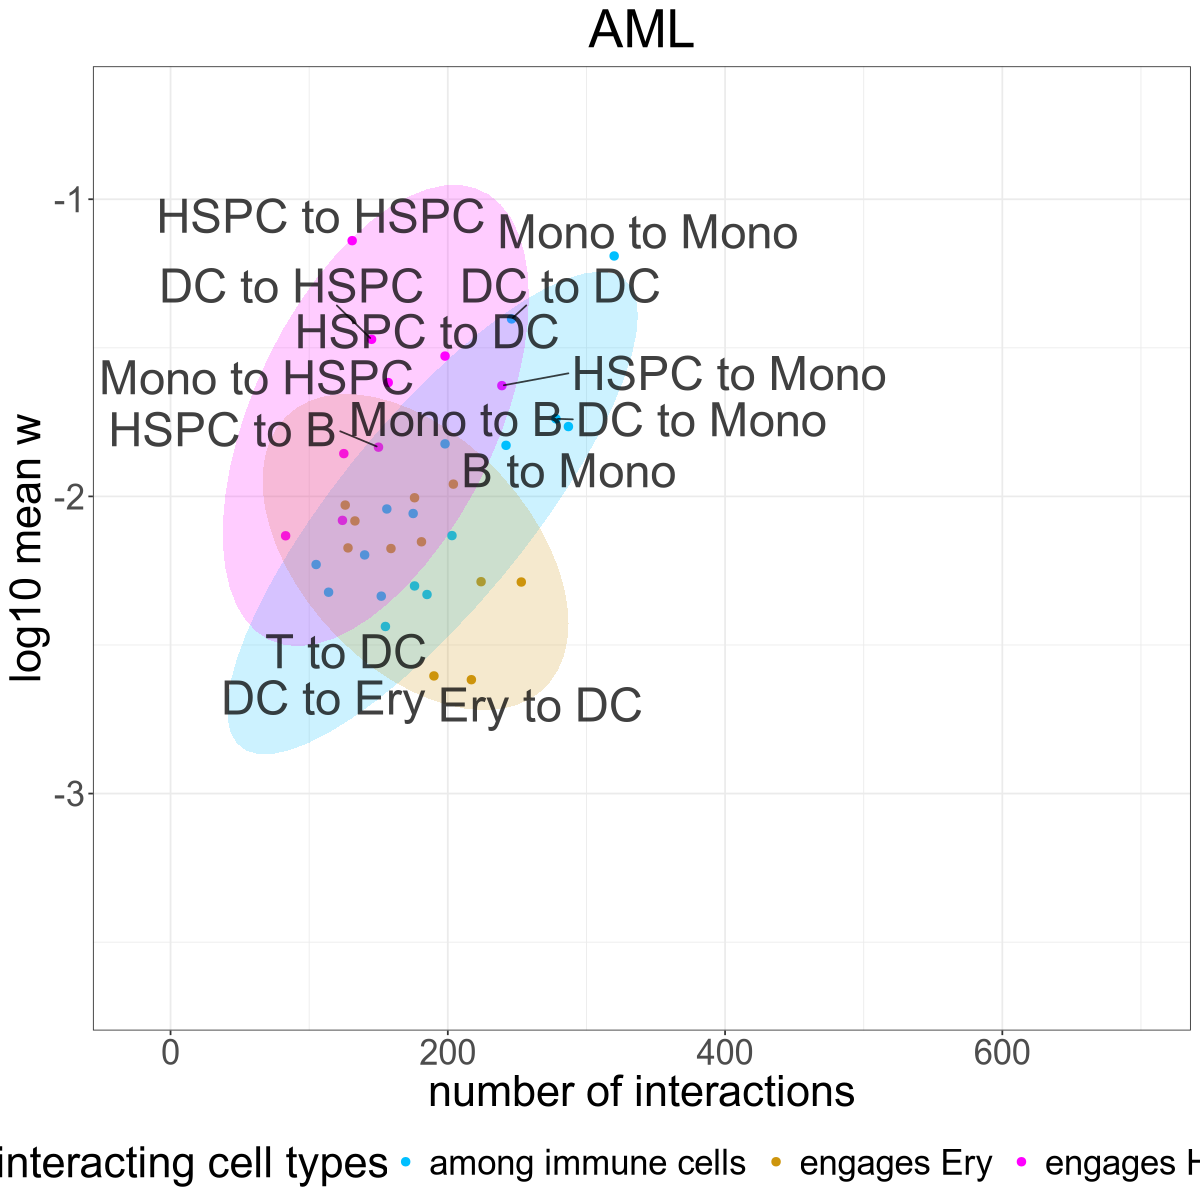

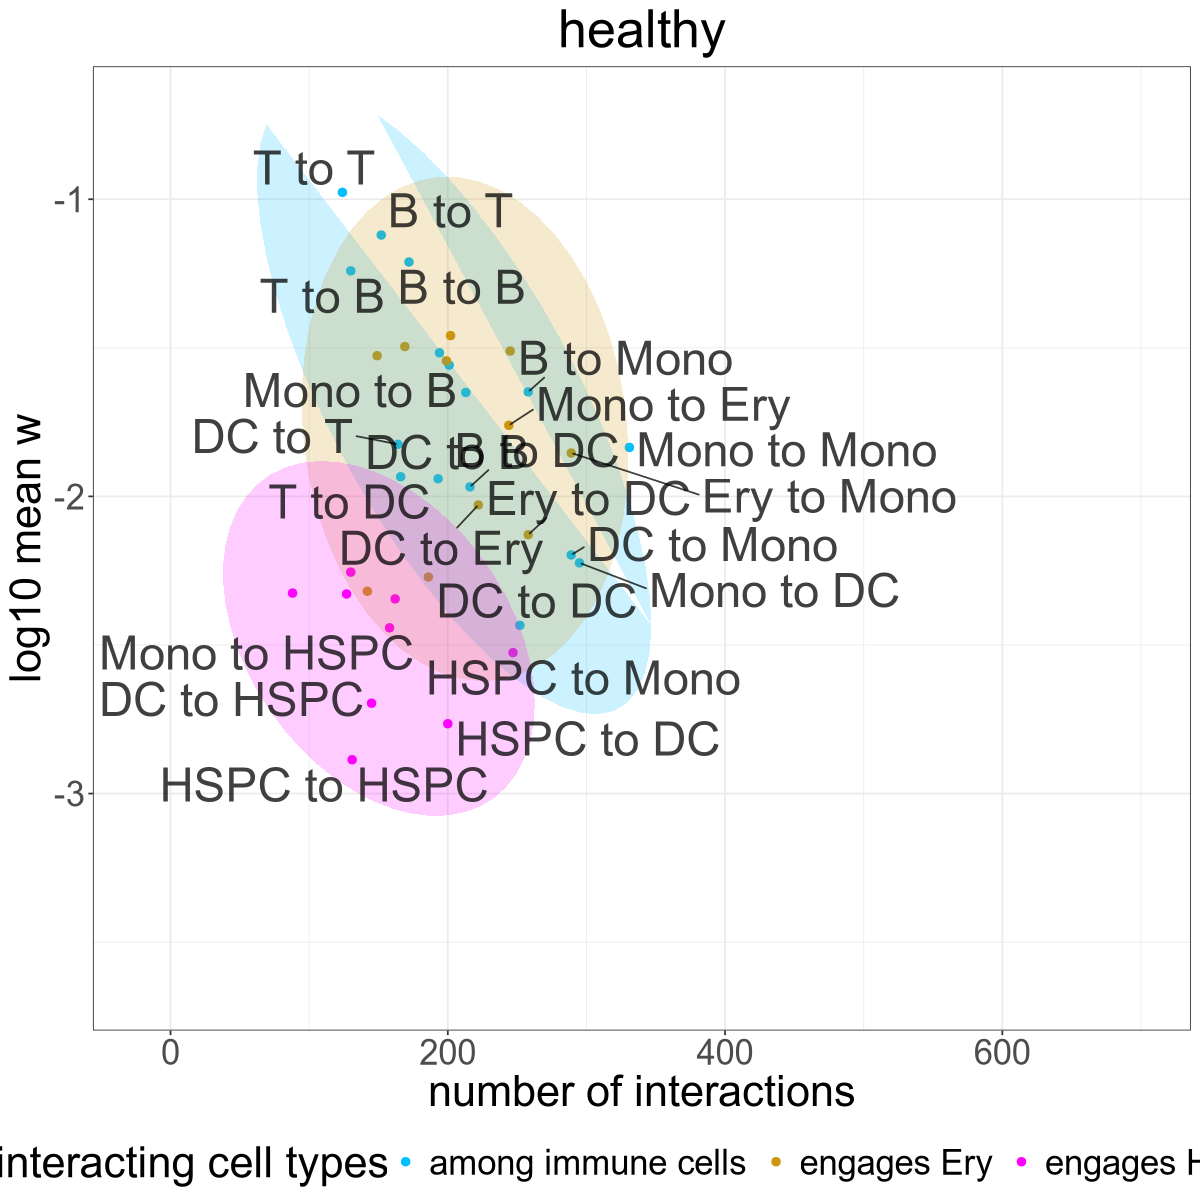

In [12]:
# plot mumber of interactions vs mean interaction weights per cell type to cell type interaction
options(repr.plot.width = 10
        ,repr.plot.height = 10)

ylim <- c(-3.65, -0.7)
xlim <- c(-20, 700)

plot_nrInt_vs_meanW_perCellType(interactions
                               ,interaction_type = interaction_type
                               ,colors = colors_interaction_type
                               ,ylim = ylim
                               ,label_font_size = 10)

## Visualization of differential interactions

### Voclano

In [14]:
print("downregulated:")
print(sum(idx_down & idx_sign))

print("upregulated:")
print(sum(idx_up & idx_sign))

[1] "downregulated:"
[1] 3280
[1] "upregulated:"
[1] 229


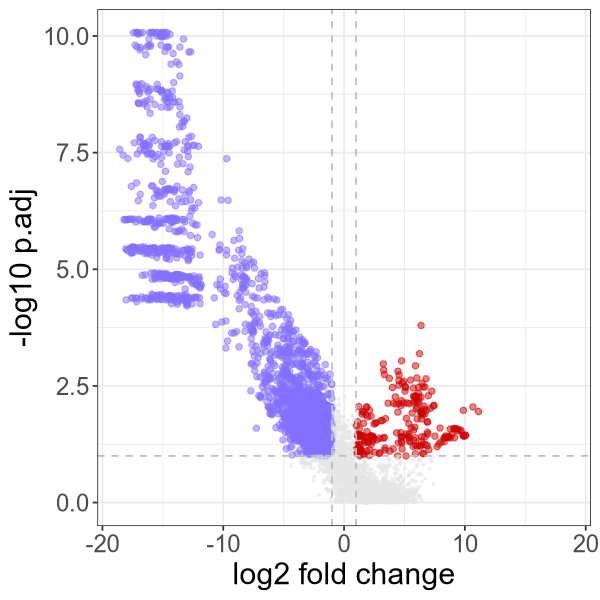

In [15]:
# volcano plot
options(repr.plot.height = 5
       ,repr.plot.width = 5)
    
plot_vulcano(interactions)

### Heatmap top differential

In [16]:
library(ComplexHeatmap) # to plot heatmaps
library(circlize) # for gragient colors

Loading required package: grid

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements a

In [17]:
# heatmap of interactions weight of top differential interactions
# top adjusted p value
idx_topsign <- interactions$anno_interactions$p.adj %in% unique(sort(interactions$anno_interactions$p.adj))[1:300]
idx_topdown <- interactions$anno_interactions$log2FC_weights < -1 & idx_topsign
idx_topdown <- interactions$anno_interactions$interaction_ID %in% interactions$anno_interactions$interaction_ID[idx_topdown][1:10]

# all upregulated interactions
idx_topsign <- interactions$anno_interactions$p.adj %in% unique(sort(interactions$anno_interactions$p.adj))[1:500]
idx_topup <- interactions$anno_interactions$log2FC_weights > 1 & idx_topsign
idx_topup <- interactions$anno_interactions$interaction_ID %in% interactions$anno_interactions$interaction_ID[idx_topup][1:9]

idx <- idx_topup | idx_topdown

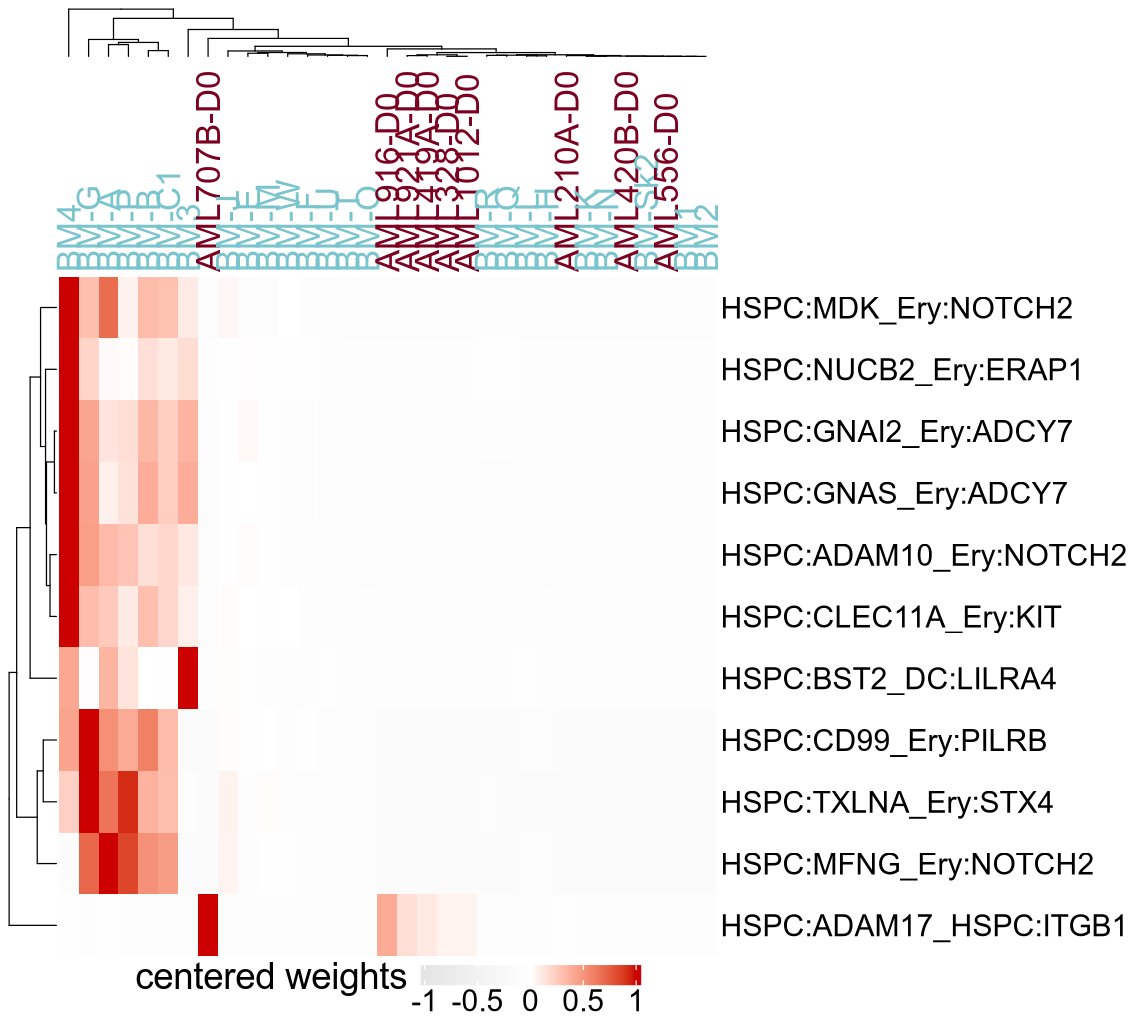

In [18]:
# centred Heatmap
set.seed(3)
options(repr.plot.height = 8.5
       ,repr.plot.width = 9.5
       )
plot_heatmap(interactions
            ,which_interactions = idx
            ,values_to_plot = "weights"
            ,row_font_size =18
            ,column_font_size = 20
             ,centered = TRUE
             ,color_values = circlize::colorRamp2(c(-1,0,1), c("gray90","white", "red3"))
             ,legend_title_font_size = 22
             ,labels_font_size = 18
            )

### Network plots

In [19]:
library(igraph) # to plot circus plots


Attaching package: ‘igraph’


The following object is masked from ‘package:circlize’:

    degree


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




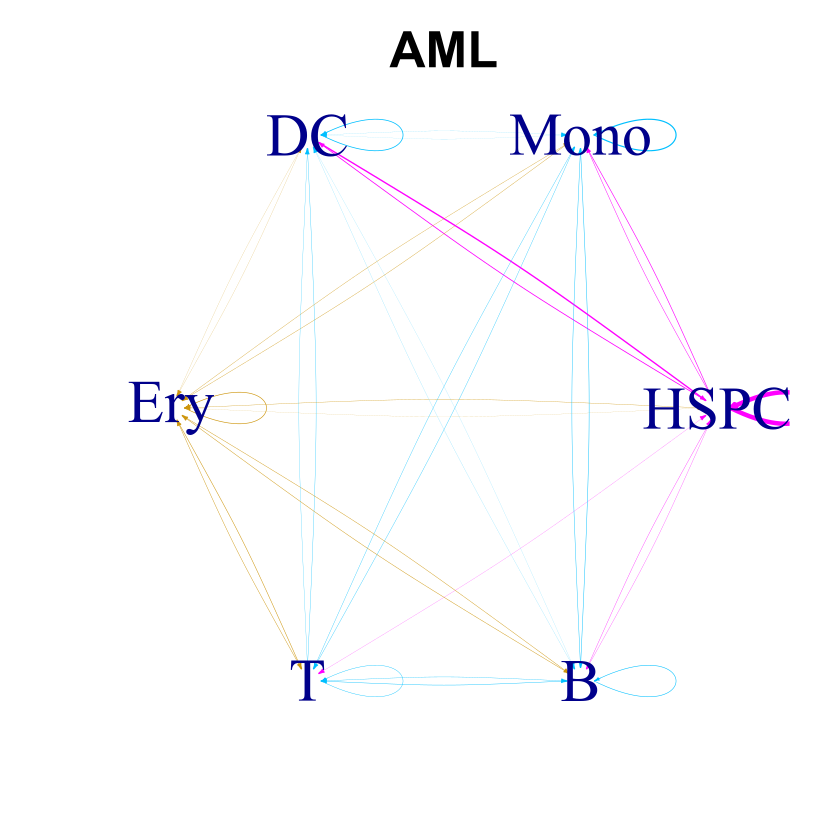

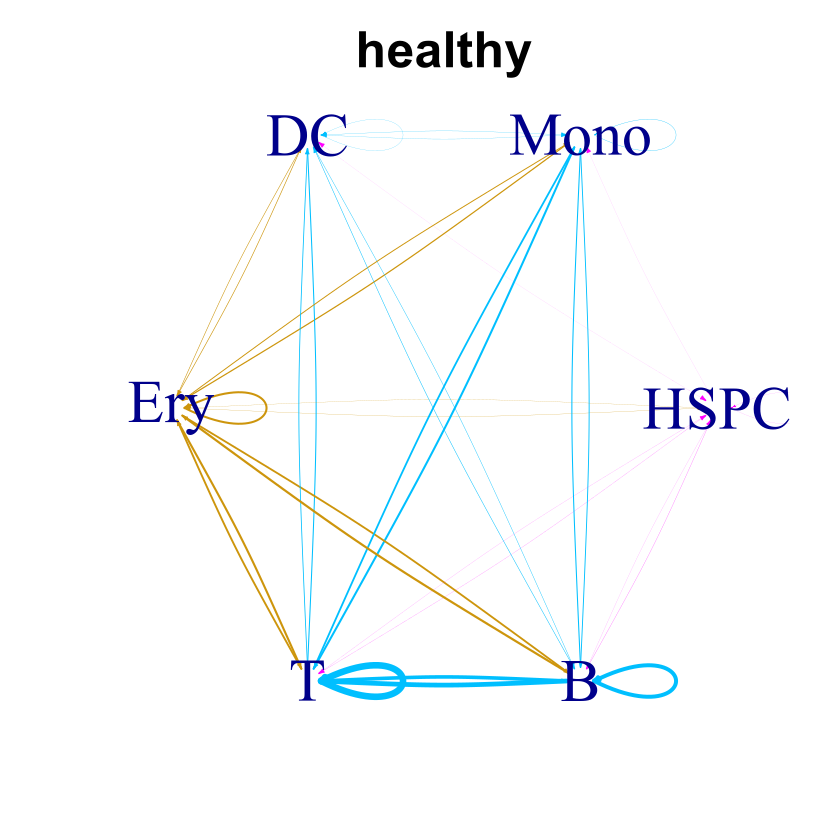

In [20]:
options(repr.plot.width = 7
       ,repr.plot.height = 7)

colors <- colors_interaction_type[interaction_type]
names(colors) <- names(interaction_type)

plor_celltype_network(interactions
                     ,edge.color = colors
                     ,title_cex = 2.5
                     ,vertex.label.cex = 3
                     ,edge.arrow.size = 0.2
                     ,verbose = FALSE
                     )

## Visualization of individual components

<img src="../components_scheme.png">

### Forest plots

In [21]:
library(gridExtra) 

In [22]:
ordered_IDs <- order_IDs_by_interaction_categories(interactions)
print(str(ordered_IDs))
print(length(unlist(ordered_IDs)))

List of 34
 $ ID_order_no_change                       : chr [1:3] "Mono:C1QA_Mono:CD93" "Mono:B2M_Mono:CD1C" "Mono:PIK3R1_Mono:EPN1"
 $ ID_order_rho_s_only_down                 : chr [1:274] "Ery:CCL3_Mono:CCR1" "Ery:CCL5_Mono:CCR1" "Ery:CCL4_Mono:CCR1" "Ery:ANXA1_Mono:FPR1" ...
 $ ID_order_phi_s_only_down                 : chr [1:4] "Mono:ICAM4_Mono:ITGAM" "Mono:ICAM4_Mono:ITGB2" "Mono:ICAM4_Mono:ITGA4" "Mono:ICAM4_Mono:ITGB1"
 $ ID_order_p_s_only_down                   : chr(0) 
 $ ID_order_rho_r_only_down                 : chr [1:255] "Mono:IL1RN_Ery:IL2RG" "Mono:GRN_Ery:TNFRSF1A" "Mono:CCL5_Ery:ACKR1" "Mono:CXCL2_Ery:ACKR1" ...
 $ ID_order_phi_r_only_down                 : chr(0) 
 $ ID_order_p_r_only_down                   : chr(0) 
 $ ID_order_rho_s_only_up                   : chr [1:2] "HSPC:ALOX5AP_Mono:ALOX5" "DC:CD69_Mono:KLRB1"
 $ ID_order_phi_s_only_up                   : chr(0) 
 $ ID_order_p_s_only_up                     : chr(0) 
 $ ID_order_rho_r_only_up               

#### Split by category

In [23]:
component_lim <- find_component_limits(interactions, ordered_IDs)

print(str(component_lim))

List of 14
 $ log2FC_w_min    : num -18.6
 $ log2FC_w_max    : num 11.1
 $ log2FC_rho_s_min: num -2.77
 $ log2FC_rho_s_max: num 3.22
 $ log2FC_phi_s_min: num -7.77
 $ log2FC_phi_s_max: num 5.89
 $ log2FC_p_s_min  : num -3.76
 $ log2FC_p_s_max  : num 0.704
 $ log2FC_rho_r_min: num -2.77
 $ log2FC_rho_r_max: num 3.22
 $ log2FC_phi_r_min: num -7.23
 $ log2FC_phi_r_max: num 3.63
 $ log2FC_p_r_min  : num -3.12
 $ log2FC_p_r_max  : num 0.636
NULL


In [24]:
forestplot_for_category <- function(IDs){
    # revert
    IDs <- IDs[length(IDs):1]
    
    rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
    my_anno_interactions <- interactions$anno_interactions[IDs,]
    my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                                 ,ordered = TRUE
                                                        )
    
    print(paste(nrow(my_anno_interactions), "interactions in this category"))
    
    plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                     ,my_anno_interactions = my_anno_interactions
                     ,keep_order = TRUE
                     ,threshold = 1
                     ,legend_title_size = 0
                     ,legend_text_size = 20
                     ,component_lim = component_lim
                    )
}

[1] "3 interactions in this category"


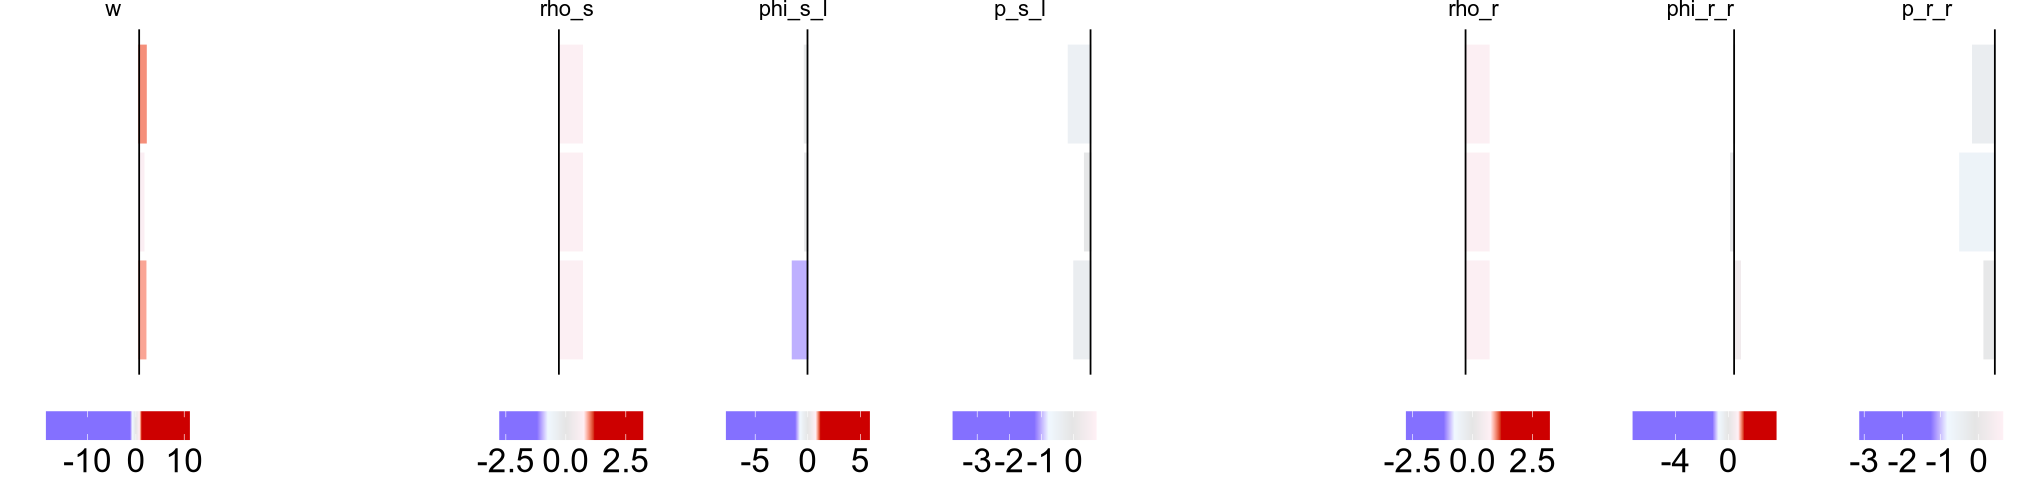

In [25]:
options(repr.plot.width = 17
       ,repr.plot.height = 4)

IDs <- as.character(c(ordered_IDs$ID_order_no_change))
forestplot_for_category(IDs)

[1] "533 interactions in this category"


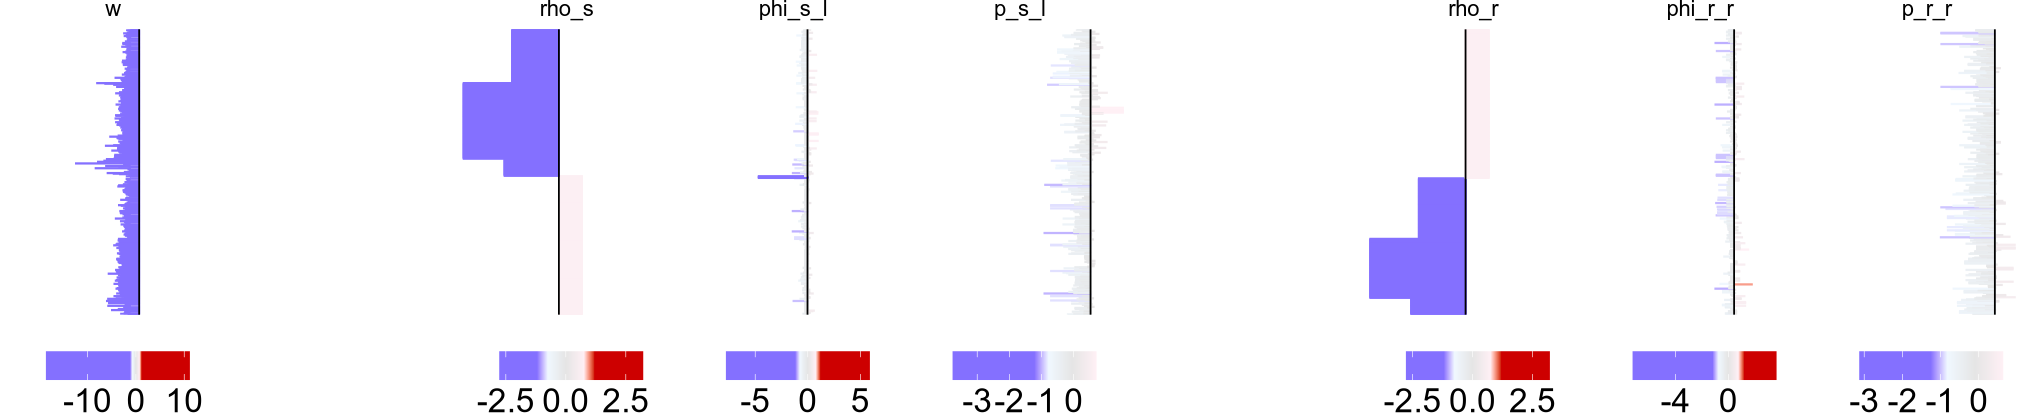

In [26]:
options(repr.plot.width = 17
       ,repr.plot.height = 3.5
       )

IDs <- as.character(c(ordered_IDs$ID_order_rho_s_only_down
                         ,ordered_IDs$ID_order_phi_s_only_down
                         ,ordered_IDs$ID_order_p_s_only_down
                         ,ordered_IDs$ID_order_rho_r_only_down
                         ,ordered_IDs$ID_order_phi_r_only_down
                         ,ordered_IDs$ID_order_p_r_only_down
                     ))

forestplot_for_category(IDs)

[1] "3 interactions in this category"


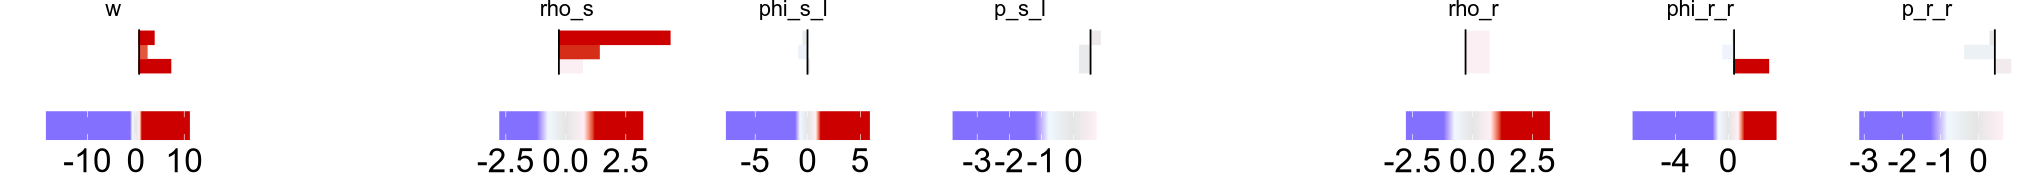

In [27]:
options(repr.plot.width = 17
       ,repr.plot.height = 1.5)

IDs <- as.character(c(ordered_IDs$ID_order_rho_s_only_up
                          ,ordered_IDs$ID_order_phi_s_only_up
                          ,ordered_IDs$ID_order_p_s_only_up
                          ,ordered_IDs$ID_order_rho_r_only_up
                          ,ordered_IDs$ID_order_phi_r_only_up
                          ,ordered_IDs$ID_order_p_r_only_up
                     ))

forestplot_for_category(IDs)

[1] "1743 interactions in this category"


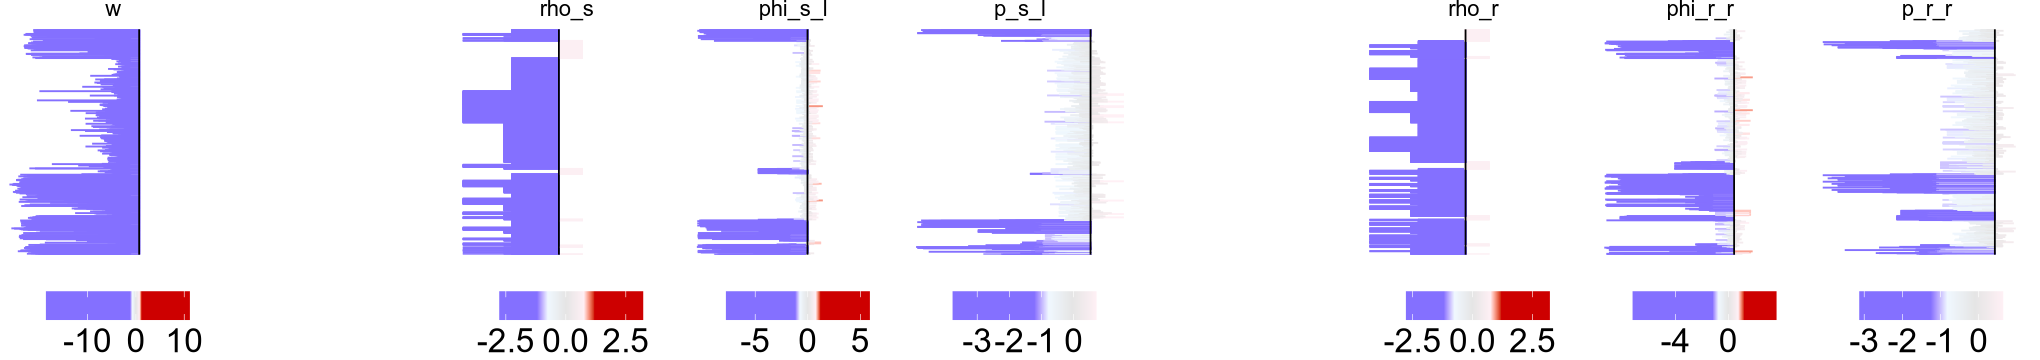

In [28]:
options(repr.plot.width = 17
       ,repr.plot.height = 3)

IDs <- as.character(c(ordered_IDs$ID_order_concordantDown_s
                          ,ordered_IDs$ID_order_concordantDown_r
                          ,ordered_IDs$ID_order_concordantDown_b_one_one
                          ,ordered_IDs$ID_order_concordantDown_b_one_several
                          ,ordered_IDs$ID_order_concordantDown_b_several_one
                          ,ordered_IDs$ID_order_concordantDown_b_several_several
                     ))

forestplot_for_category(IDs)

[1] "142 interactions in this category"


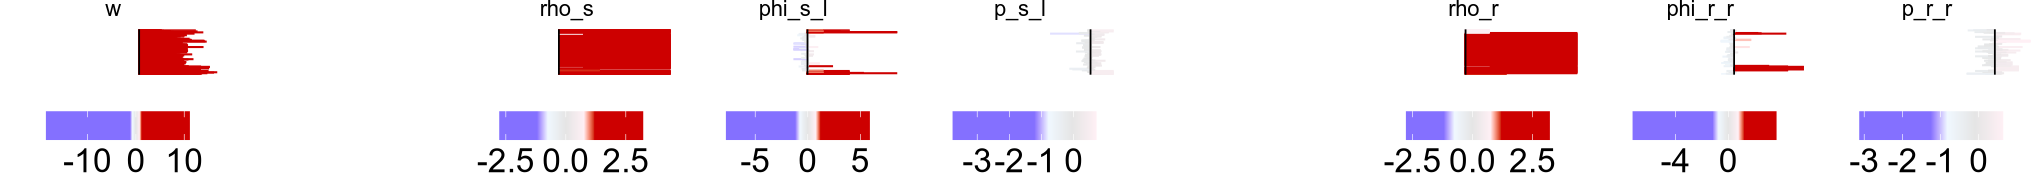

In [29]:
options(repr.plot.width = 17
       ,repr.plot.height = 1.5)

IDs <- as.character(c(ordered_IDs$ID_order_concordantUp_s
                          ,ordered_IDs$ID_order_concordantUp_r
                          ,ordered_IDs$ID_order_concordantUp_b_one_one
                          ,ordered_IDs$ID_order_concordantUp_b_one_several
                          ,ordered_IDs$ID_order_concordantUp_b_several_one
                          ,ordered_IDs$ID_order_concordantUp_b_several_several
                     ))

forestplot_for_category(IDs)

[1] "999 interactions in this category"


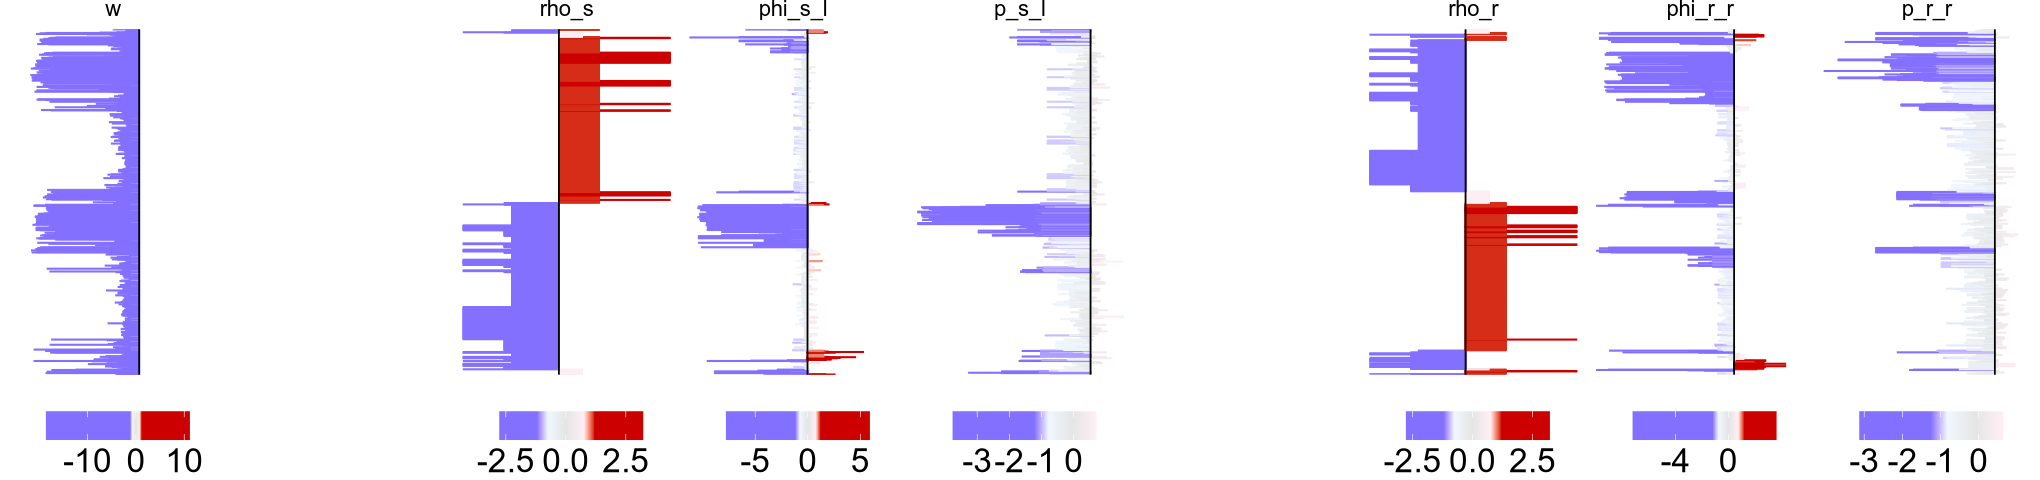

In [30]:
options(repr.plot.width = 17
       ,repr.plot.height = 4)

IDs <- as.character(c(ordered_IDs$ID_order_insuffDown_s
                          ,ordered_IDs$ID_order_insuffDown_r
                          ,ordered_IDs$ID_order_insuffDown_b
                     ))

forestplot_for_category(IDs)

[1] "43 interactions in this category"


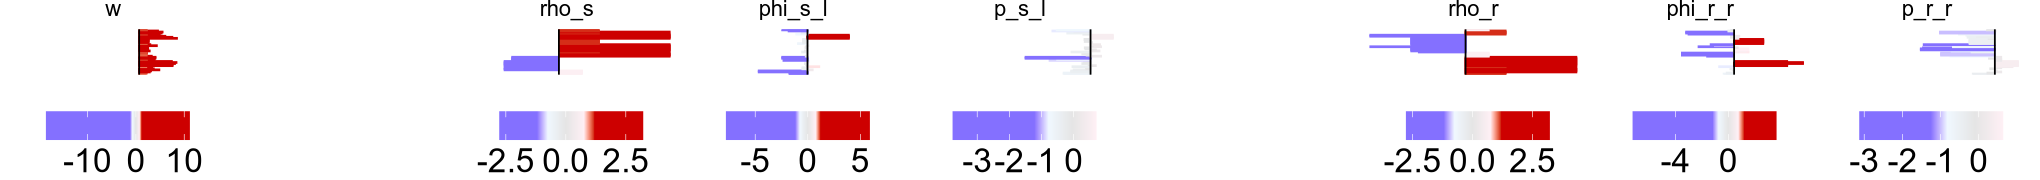

In [31]:
options(repr.plot.width = 17
       ,repr.plot.height = 1.5)

IDs <- as.character(c(ordered_IDs$ID_order_insuffUp_s
                          ,ordered_IDs$ID_order_insuffUp_r
                          ,ordered_IDs$ID_order_insuffUp_b
                     ))

forestplot_for_category(IDs)

[1] "830 interactions in this category"


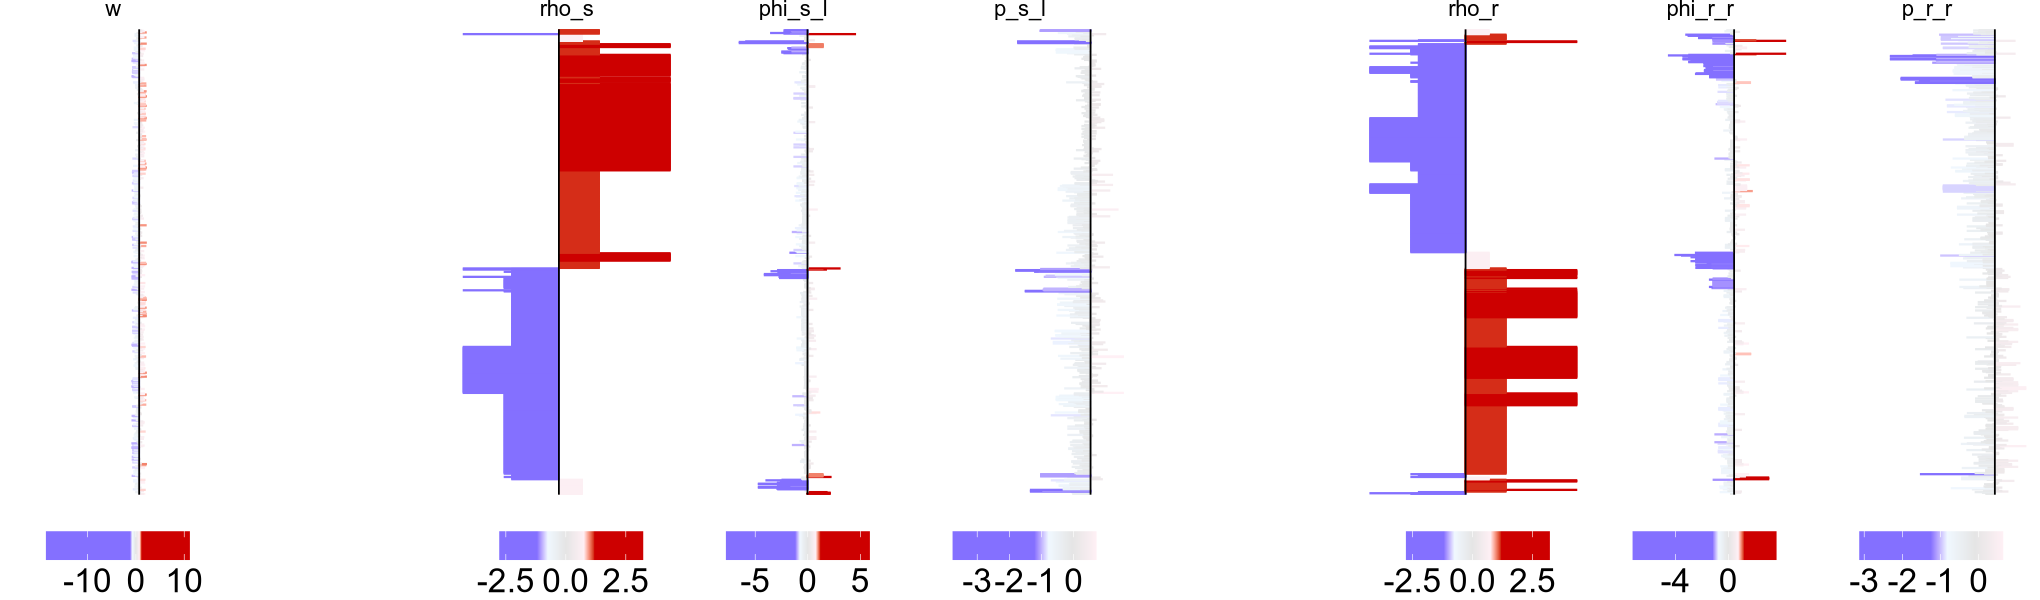

In [32]:
options(repr.plot.width = 17
       ,repr.plot.height = 5)

IDs <- as.character(c(ordered_IDs$ID_order_suffComp_s
                      ,ordered_IDs$ID_order_suffComp_r
                      ,ordered_IDs$ID_order_suffComp_b
                 ))

forestplot_for_category(IDs)

In [33]:
output_dir = "each_component_values/"

In [35]:
# write.csv(interactions$a_s, file = paste0(output_dir, "interactions_a_s.csv"), row.names = TRUE)
# write.csv(interactions$a_r, file = paste0(output_dir, "interactions_a_r.csv"), row.names = TRUE)
# write.csv(interactions$e_s_l, file = paste0(output_dir, "interactions_e_s_l.csv"), row.names = TRUE)
# write.csv(interactions$e_r_r, file = paste0(output_dir, "interactions_e_r_r.csv"), row.names = TRUE)
# write.csv(interactions$rho_r, file = paste0(output_dir, "interactions_rho_r.csv"), row.names = TRUE)
# write.csv(interactions$rho_s, file = paste0(output_dir, "interactions_rho_s.csv"), row.names = TRUE)

# write.csv(interactions$phi_r_r, file = paste0(output_dir, "interactions_phi_r_r.csv"), row.names = TRUE)
# write.csv(interactions$phi_s_l, file = paste0(output_dir, "interactions_phi_s_l.csv"), row.names = TRUE)

# write.csv(interactions$p_r_r, file = paste0(output_dir, "interactions_p_r_r.csv"), row.names = TRUE)
# write.csv(interactions$p_s_l, file = paste0(output_dir, "interactions_p_s_l.csv"), row.names = TRUE)
# write.csv(interactions$weights, file = paste0(output_dir, "interactions_weights.csv"), row.names = TRUE)

In [36]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS/LAPACK: /home/mami/miniconda3/envs/community/lib/libopenblasp-r0.3.26.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=de_DE.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] gridExtra_2.3         igraph_2.0.2          circlize_0.4.16      
[4] ComplexHeatmap_2.18.0 ggrepel_0.9.5         ggplot2_3.5.0        
[7] community_1.4.4      

loaded via a namespace (and not attached):